In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')
from pandas import ExcelWriter
from pandas import ExcelFile

In [128]:
#Importing the data
data = pd.read_csv(r'C:/Users/laks0/Documents/GitHub/Springboard/Capstone 1/train_users_2.csv', index_col=None)
data.head(10)

,id,secs_elapsed,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,NaN,2010-06-28,2.010000e+13,NaN,-unknown-,NaN,facebook,0.0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,NaN,2011-05-25,2.010000e+13,NaN,MALE,38.0,facebook,0.0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,NaN,2010-09-28,2.010000e+13,2010-08-02,FEMALE,56.0,basic,3.0,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,NaN,2011-12-05,2.010000e+13,2012-09-08,FEMALE,42.0,facebook,0.0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,NaN,2010-09-14,2.010000e+13,2010-02-18,-unknown-,41.0,basic,0.0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,NaN,2010-01-01,2.010000e+13,2010-01-02,-unknown-,NaN,basic,0.0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,NaN,2010-01-02,2.010000e+13,2010-01-05,FEMALE,46.0,basic,0.0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,NaN,2010-01-03,2.010000e+13,2010-01-13,FEMALE,47.0,basic,NaN,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,NaN,2010-01-04,2.010000e+13,2010-07-29,FEMALE,50.0,basic,0.0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,NaN,2010-01-04,2.010000e+13,2010-01-04,-unknown-,46.0,basic,0.0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [129]:
#Converting in to a dataframe & inital analysis of missing values, we see that date of first booking, age and first affliate
# tracked have the most missing values
df = pd.DataFrame(data)
len(df) - df.count()

id                              0
secs_elapsed               197951
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     1
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [130]:
print(df.language.unique())
print(df.country_destination.unique())
print(df.first_affiliate_tracked.unique())
print(df.affiliate_provider.unique())
print(df.signup_app.unique())
print(df.first_device_type.unique())
print(df.first_browser.unique())
print(df.signup_method.unique())
print(df.gender.unique())

['en' 'fr' 'de' 'es' 'it' 'pt' 'zh' 'ko' 'ja' 'ru' 'pl' 'el' 'sv' 'nl'
 'hu' 'da' 'id' 'fi' 'no' 'tr' 'th' 'cs' 'hr' 'ca' 'is']
['NDF' 'US' 'other' 'FR' 'CA' 'GB' 'ES' 'IT' 'PT' 'NL' 'DE' 'AU']
['untracked' 'omg' nan 'linked' 'tracked-other' 'product' 'marketing'
 'local ops']
['direct' 'google' 'other' 'craigslist' 'facebook' 'vast' 'bing' 'meetup'
 'facebook-open-graph' 'email-marketing' 'yahoo' 'padmapper' 'gsp' 'wayn'
 'naver' 'baidu' 'yandex' 'daum']
['Web' 'Moweb' 'iOS' 'Android']
['Mac Desktop' 'Windows Desktop' 'iPhone' 'Other/Unknown'
 'Desktop (Other)' 'Android Tablet' 'iPad' 'Android Phone'
 'SmartPhone (Other)']
['Chrome' 'IE' 'Firefox' 'Safari' '-unknown-' 'Mobile Safari'
 'Chrome Mobile' 'RockMelt' 'Chromium' 'Android Browser' 'AOL Explorer'
 'Palm Pre web browser' 'Mobile Firefox' 'Opera' 'TenFourFox' 'IE Mobile'
 'Apple Mail' 'Silk' 'Camino' 'Arora' 'BlackBerry Browser' 'SeaMonkey'
 'Iron' 'Sogou Explorer' 'IceWeasel' 'Opera Mini' 'SiteKiosk' 'Maxthon'
 'Kindle Browser'

3950


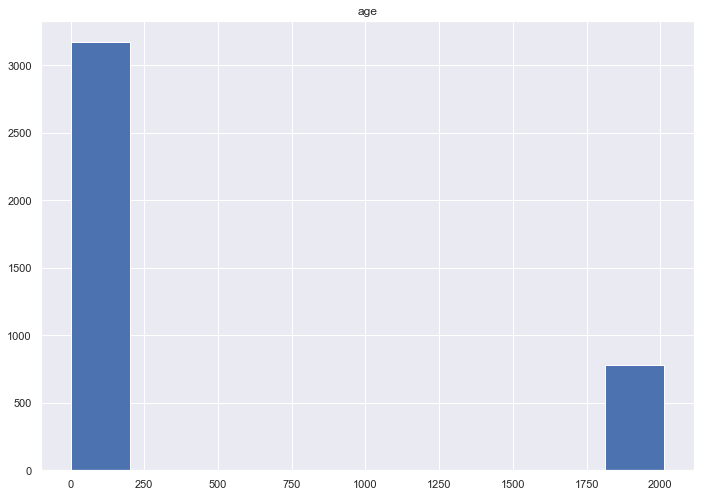

In [131]:
#There are people representing ages below 18 who are ineligible to do a booking on Airbnb,
#We also assumed that people above the age of 70 would not be potential tourists
dfcv = data
dfcv = dfcv[(dfcv.age > 70)|(dfcv.age < 18)]
dfcv.hist(column='age')
print(len(dfcv))

121511


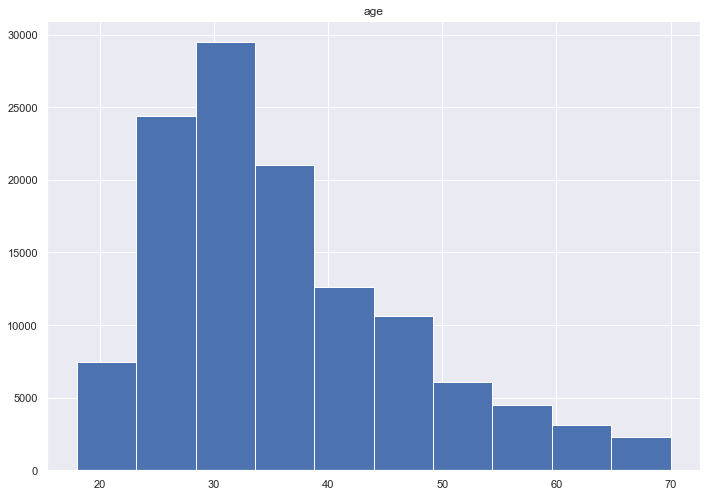

In [132]:
#Counting & Plotting data for ages between 18 to 70 as people under 18 cannot book a vacation and people above the age of 70 
# are unlikely to go on one
dfcv = data
dfcv = dfcv[(dfcv.age != '')]
dfcv = dfcv[(dfcv.age <= 70)]
dfcv = dfcv[(dfcv.age >= 18)]
dfcv.hist(column='age')
print(len(dfcv))

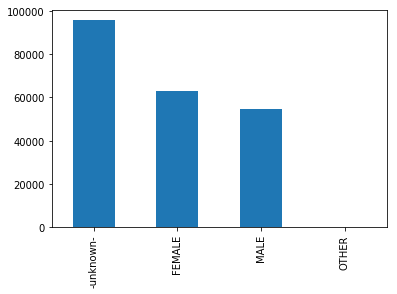

In [7]:
#Visualizing the data for all genders
# Unknown gender seems to be leading the charts followed by females and males, Classic case of 'data not missing at random'.
dfg = data
dfg = data['gender'].value_counts().plot(kind='bar')

In [8]:
import copy
%matplotlib inline

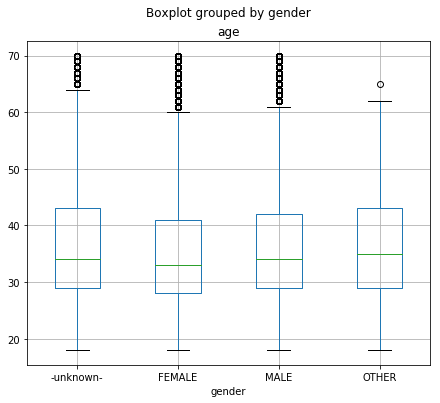

In [9]:
#Comparing Gender versus Age group, we observed that the median age group is around 32 to 35 but are different distributions
#Females, Males & Unknown have pointers which are 1.5 times the upper quartile
#25% of data for Females & Males is greater than the age of 60 & 62 respectively while unknown & Other have an age of 
#63 & 65
a = pd.read_csv('C:/Users/laks0/Documents/GitHub/Springboard/Capstone 1/train_users_2.csv', index_col=None)
acd = a[['age', 'gender']]
acd = acd[np.isfinite(acd['age'])]
acd = acd[acd.age >= 18]
acd = acd[acd.age <= 70]
acd.boxplot('age', 'gender', figsize=(7,6))

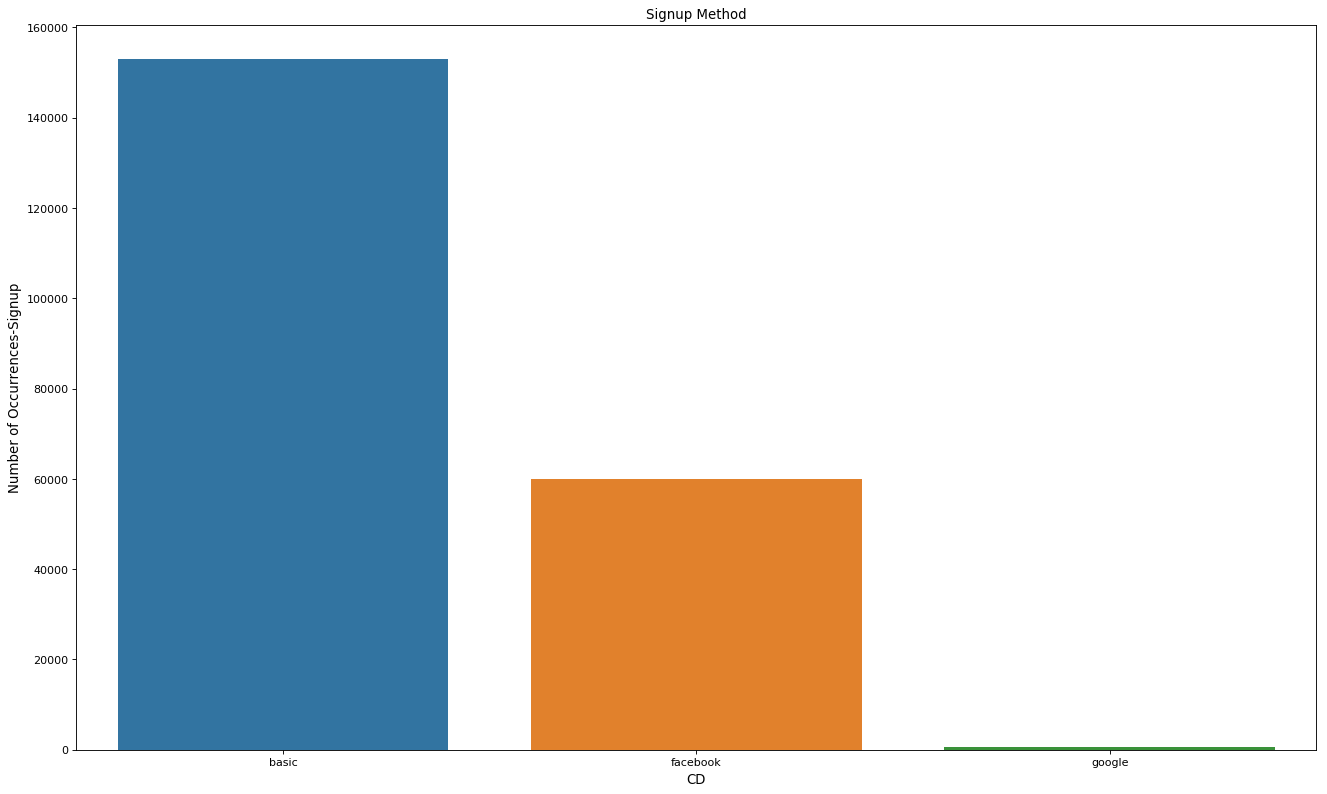

In [10]:
#Signup Method versus Country of destination
#We observed that basic signup method was used for sign up for most of the countries 
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 12), dpi=80, facecolor='w', edgecolor='k')
scd = a[['signup_method', 'country_destination']]
signup_count = scd['signup_method'].value_counts()
country_count = scd['country_destination'].value_counts()
sns.barplot(signup_count.index, signup_count.values)
plt.title('Signup Method')
plt.ylabel('Number of Occurrences-Signup', fontsize=12)
plt.xlabel('CD', fontsize=12)
plt.show()

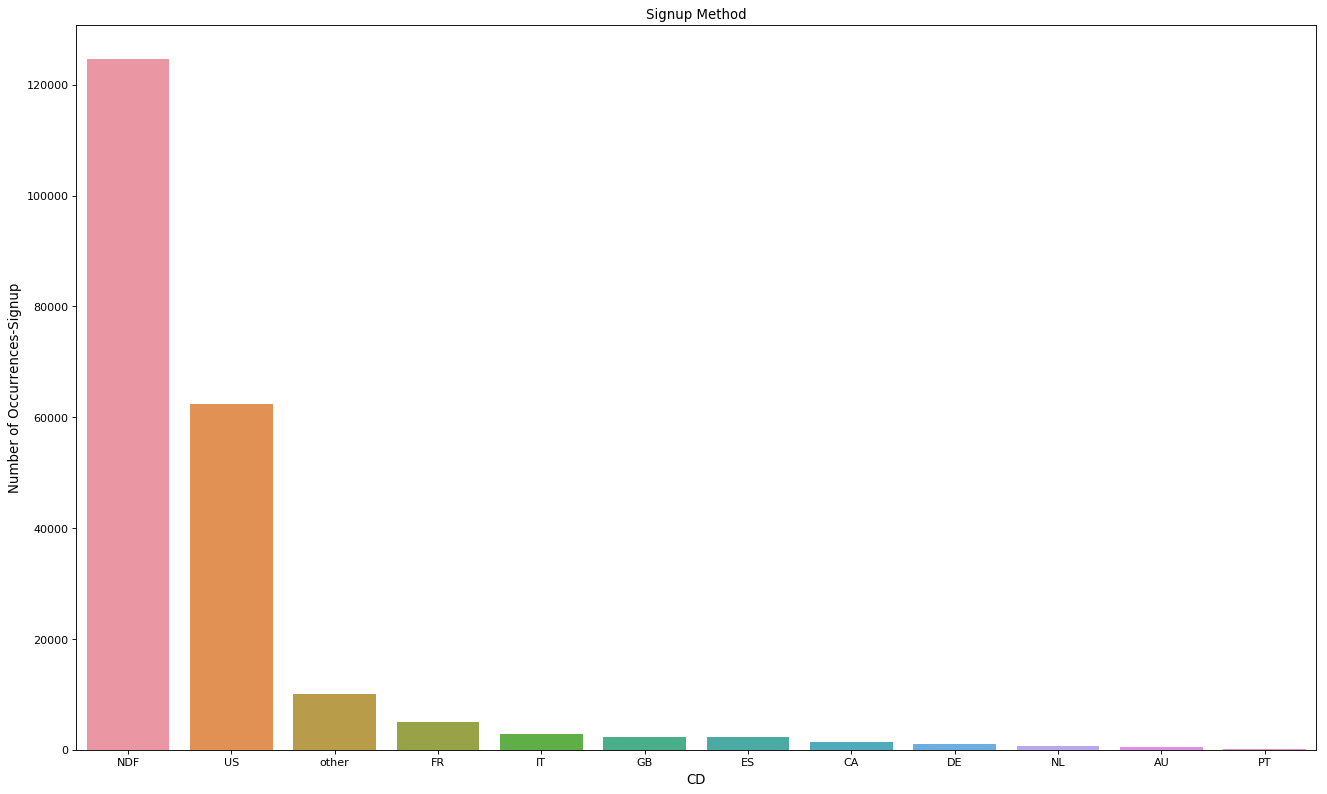

In [11]:
#Country of Destination versus age
#We observed that most of the age group chose no destination followed by the US and other
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 12), dpi=80, facecolor='w', edgecolor='k')
scd = a[['age', 'country_destination']]
cd_count = scd['country_destination'].value_counts()
age_count = scd['age'].value_counts()
sns.barplot(cd_count.index, cd_count.values)
plt.title('Signup Method')
plt.ylabel('Number of Occurrences-Signup', fontsize=12)
plt.xlabel('CD', fontsize=12)
plt.show()

In [12]:
age_b = pd.read_csv(r'C:\Users\laks0\Documents\GitHub\Springboard\Capstone 1\age_bkts.csv')
age_b.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,15-19,AU,male,768,2015
1,15-19,AU,female,737,2015
2,15-19,CA,male,1054,2015
3,15-19,CA,female,1009,2015
4,15-19,DE,male,2076,2015


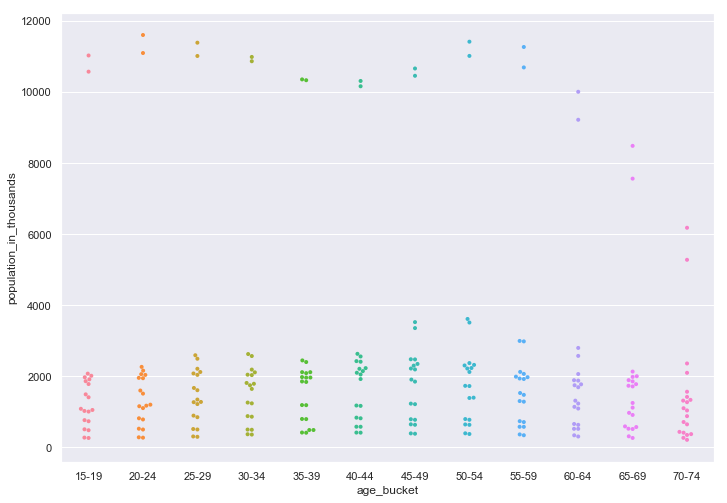

In [13]:
#Plotting the no. of people based on age range, we can see that the age group of 20-24,25-29 & 50-54 have the highest no. of people
# interested in going for a vacation
sns.set(rc={'figure.figsize':(11.7,8.27)})
agebplot = sns.swarmplot(x='age_bucket', y='population_in_thousands', data=age_b, size = 4)

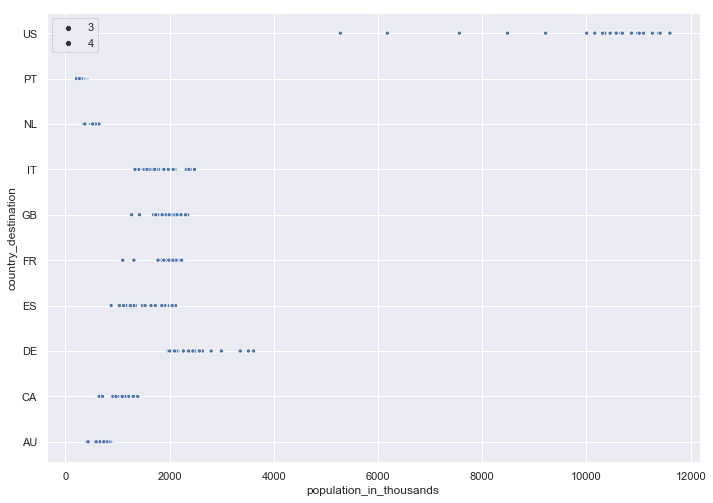

In [14]:
#Plotting the countries most people are interested in going to for a vacation; US clearly is the winner here followed by 
# Denmark & Italy
sns.set(rc={'figure.figsize':(11.7,8.27)})
countryplot = sns.scatterplot(x='population_in_thousands', y='country_destination', data=age_b, size = 4)

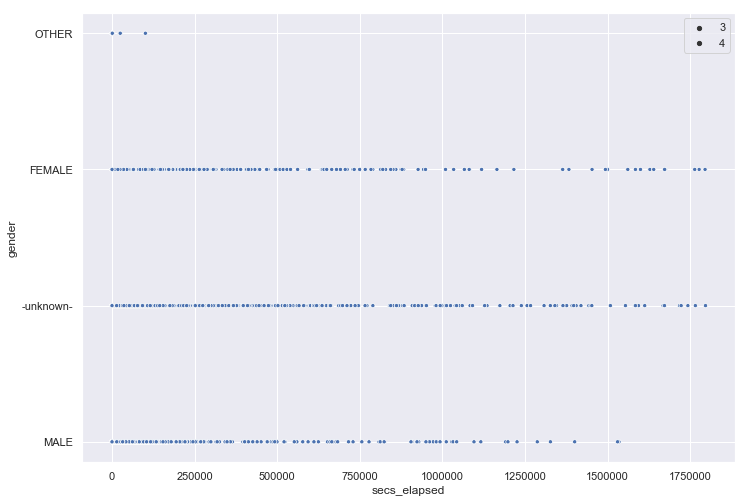

In [15]:
#Plotting the gender vs time spent on the website, Female & Unknown genders seem to be spending most amount of time browsing
sns.set(rc={'figure.figsize':(11.7,8.27)})
timeplot = sns.scatterplot(x='secs_elapsed', y='gender', data=data, size = 4)

In [16]:
#Second check on missing values, only seconds elapsed seem to be high in number and could also be removed as a column
#since it has 113k missing values out 121k total rows
print(len(df) - df.count())
print(len(df))

id                              0
secs_elapsed               197951
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     1
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64
213451


In [17]:
#Dropping column name 'first_affiliate_tracked'as none of the data entries are relevant to what we intend to predict: Pls note 
# df includes people aged between 18 to 70 years only.#Second check on missing values, only seconds elapsed seem 
#to be high in number and could also be removed as a column, since it has 113k missing values out 121k total rows
df = data
df = df[(df.age != '')]
df = df[(df.age <= 70)]
df = df[(df.age >= 18)]
df = df.drop(columns=['secs_elapsed', 'first_affiliate_tracked'])
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,signup_app,first_device_type,first_browser,country_destination
1,820tgsjxq7,2011-05-25,2.010000e+13,NaN,MALE,38.0,facebook,0.0,en,seo,google,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2.010000e+13,2010-08-02,FEMALE,56.0,basic,3.0,en,direct,direct,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2.010000e+13,2012-09-08,FEMALE,42.0,facebook,0.0,en,direct,direct,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2.010000e+13,2010-02-18,-unknown-,41.0,basic,0.0,en,direct,direct,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,2.010000e+13,2010-01-05,FEMALE,46.0,basic,0.0,en,other,craigslist,Web,Mac Desktop,Safari,US


In [18]:
#Generate a hypothesis based on avg age of people visiting the top two oreferred countries US & Denamrk
#H0 = The avg age of people wanting to go to the US is approximately equal to the ones wanting to go to Denmark
#H1= The avg age of people wanting to go to the US is not at all equal to the ones wanting to go to Denmark
dfus = df[(df.country_destination == 'US')]
dfne = df[(df.country_destination == 'DE')]
dfus_age_m = np.mean(dfus['age'])
dfne_age_m = np.mean(dfne['age'])
dfus_age_sd = np.std(dfus['age'])
dfne_age_sd = np.std(dfne['age'])
print(len(dfus))
print(len(dfne))

47279
825


In [19]:
# Conducting a t test on two independent samples
from scipy.stats import ttest_ind_from_stats
ttest_ind_from_stats(mean1=dfus_age_m, std1=dfus_age_sd, nobs1=62376,
                      mean2=dfne_age_m, std2=dfne_age_sd, nobs2=1061, equal_var = False)

Ttest_indResult(statistic=-1.6026026763030288, pvalue=0.10931213166343735)

In [ ]:
#Based on the above p value of 10% we can clearly reject our null hypothesis which states that the avg age of people wanting
#to go to the US is equal to the ones wanting to go to Denmark

In [20]:
#Conducting an Anova test on age & signup method
dffb = df[(df.signup_method == 'facebook')]
dfbs = df[(df.signup_method == 'basic')]
dfgl = df[(df.signup_method == 'google')]
df1 = dffb['age']
df2 = dfbs['age']
df3 = dfgl['age']

In [21]:
print('df1')
print(df1.describe())
print('df2')
print(df2.describe())
print('df3')
print(df3.describe())

df1
count    56575.000000
mean        35.405992
std         10.187335
min         18.000000
25%         28.000000
50%         33.000000
75%         41.000000
max         70.000000
Name: age, dtype: float64
df2
count    64796.000000
mean        36.659038
std         11.206803
min         18.000000
25%         29.000000
50%         34.000000
75%         43.000000
max         70.000000
Name: age, dtype: float64
df3
count    140.000000
mean      34.385714
std       10.063529
min       18.000000
25%       27.000000
50%       31.500000
75%       39.000000
max       63.000000
Name: age, dtype: float64


In [22]:
#H0= The signup method does not relate anyways to the age of the person
#Test of normality/variance criteria:
#The assumptions for implementing one way ANOVA include-
#The normality criterion: each group compared should come from a population following the normal distribution.
#The variance criterion (or 'homogeneity of variances'): samples should come from populations with the same variance.
#Independent samples: performance (the dependent variable) in each sample should not be affected by the conditions
#in other samples.
import scipy.stats as stats
# Shapiro-Wilk normality test 
stats.shapiro(df1), stats.shapiro(df2), stats.shapiro(df3)

((0.921214759349823, 0.0),
 (0.9317247867584229, 0.0),
 (0.9196103811264038, 4.3936680071965384e-07))

In [29]:
#Df3's p value is greater than threshold a = 0.05, therefore we "fail to reject" the null hypothesis 
#(conclusion: samples come from populations that follow normal distribution).

In [23]:
# Levene variance test  
stats.levene(df1, df2, df3)

LeveneResult(statistic=220.13870719599072, pvalue=3.696295264023709e-96)

In [31]:
#p value is lesser than threshold a = 0.05, therefore we reject the null hypothesis
#(conclusion: samples come from populations with the different variance)

In [24]:
#Performing a one way ANOVA 
F, p = stats.f_oneway(df1, df2, df3)
print('F statistic = {:5.3f} and probability p = {:5.3f}'.format(F, p))

F statistic = 207.185 and probability p = 0.000


In [ ]:
#Interpretation of results:
#As p < a (0.05) we state that we have a main interaction effect. This simply means that amongst group comparison
#identifies statistically significant differences. However, this result does not identify the sample pair (or pairs)
#which cause this significance.
#So, when ANOVA reports 'interaction effect' we need to further identify the group pairs by applying pair-wise controls.
#Although these controls could be done by implementing ordinary t-test (as demonstrated below)

In [25]:
# apply ttest_indep()
t, p = stats.ttest_ind(df1, df2)
print('df1 vs df2:', t, p)

t, p = stats.ttest_ind(df1, df3)
print('df1 vs df2:', t, p)

t, p = stats.ttest_ind(df2, df3)
print('df2 vs df3:', t, p)

df1 vs df2: -20.269560244804744 3.3837520203276997e-91
df1 vs df2: 1.1835810452100621 0.23658390827855755
df2 vs df3: 2.39808641287269 0.016483781257107855


In [ ]:
#We can clearly see that the pairs df2 & 3(signup methods - basic & google) are the ones that cause the significant 
#differences.Please do note that applying a Tukey test would be more appropriate in this case than a t test for
#better accurancy however it is out of scope for this project.

In [26]:
#Creating a contigency table for Chi Square test:
#H0= We believe there is no relationship between gender and country of destination (are independent of each other)
#H1 = These two variable are not independent of each other
contingency_table = pd.crosstab(
    df['gender'], df['country_destination'])
contingency_table
#Each cell in this table represents a frequency count. For example, the intersection of the 'Male' row 
#and the 'Canada' column of the table would represent how many males prefer going to Canada

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
gender,,,,,,,,,,,,
-unknown-,60,182,116,255,602,277,337,4503,96,22,8209,1269
FEMALE,192,417,322,792,1771,800,989,26765,224,68,20834,2864
MALE,170,444,384,611,1218,625,623,23618,257,63,18134,3177
OTHER,1,5,3,4,13,3,5,62,3,1,102,19


In [27]:
from scipy import stats
stats.chi2_contingency(contingency_table)[:3]
#With a p-value < 0.05 , we reject the null hypothesis. There is a strong relationship between
#'gender' and the 'country of destination' column, we can see that these two variables are not independent of each other.

(2397.333604573684, 0.0, 33)

In [27]:
#Creating a contigency table for Chi Square test:
#H0= We believe there is no relationship between signup method and country of destination (are independent of each other)
#H1 = These two variable are not independent of each other
contingency_table = pd.crosstab(
    df['signup_method'], df['country_destination'])
contingency_table
#Each cell in this table represents a frequency count.

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
signup_method,,,,,,,,,,,,
basic,282,738,507,1038,2387,1127,1300,21293,386,91,30899,4748
facebook,141,309,317,623,1214,578,652,33598,194,62,16315,2572
google,0,1,1,1,3,0,2,57,0,1,65,9


In [28]:
from scipy import stats
stats.chi2_contingency(contingency_table)[:3]
#With a p-value < 0.05 , we reject the null hypothesis. There is a strong relationship between
#'signup method' and the 'country of destination' column, we can see that these two variables are not 
#independent of each other.

(8616.825481629532, 0.0, 22)

In [30]:
#Creating a contigency table for Chi Square test:
#H0= We believe there is no relationship between language and country of destination (are independent of each other)
#H1 = These two variable are not independent of each other
contingency_table = pd.crosstab(
    df['language'], df['country_destination'])
contingency_table
#Each cell in this table represents a frequency count.

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
language,,,,,,,,,,,,
ca,0,0,0,0,0,0,0,2,0,0,2,0
cs,0,0,0,1,0,0,0,13,0,0,3,0
da,0,0,0,2,0,0,1,17,0,0,12,1
de,2,1,18,7,8,3,5,203,2,1,138,17
el,0,0,0,2,1,0,0,16,0,0,2,1
en,418,1037,789,1603,3506,1676,1903,52283,566,149,46081,7118
es,0,0,5,16,11,5,6,399,1,2,147,30
fi,0,0,0,0,1,0,0,5,0,0,4,1
fr,2,5,6,10,48,8,9,472,3,2,199,15


In [31]:
from scipy import stats
stats.chi2_contingency(contingency_table)[:3]
#With a p-value < 0.05 , we reject the null hypothesis. There is clear visible relationship between
#'language' and the 'country of destination' column, we can see that these two variables are 
#independent of each other.

(934.9181734684701, 8.626988945685242e-76, 264)

In [32]:
#Creating a contigency table for Chi Square test:
#H0= We believe there is a relationship between affiliate provider and country of destination 
#(are independent of each other)
#H1 = These two variable are independent of each other
contingency_table = pd.crosstab(
    df['affiliate_provider'], df['country_destination'])
contingency_table
#Each cell in this table represents a frequency count.

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
affiliate_provider,,,,,,,,,,,,
baidu,0,0,0,0,1,0,0,7,0,0,5,2
bing,3,10,11,14,28,9,20,586,5,4,371,69
craigslist,2,26,15,8,44,16,19,1048,5,1,964,41
direct,298,705,539,1141,2393,1159,1300,33425,371,98,31752,4910
email-marketing,0,0,0,0,0,1,1,47,1,0,21,6
facebook,2,9,15,25,39,24,24,943,9,2,411,86
facebook-open-graph,1,4,2,2,10,3,3,273,2,1,81,13
google,95,244,210,395,944,420,512,13393,161,44,10375,1736
gsp,1,0,0,0,1,0,1,143,0,0,23,7


In [33]:
from scipy import stats
stats.chi2_contingency(contingency_table)[:3]
#With a p-value > 0.05 , we fail to reject the null hypothesis. There is no visible relationship between
#'affiliate provider' and the 'country of destination' column, we can see that these two variables are 
#independent of each other.

(1288.6116440778364, 2.049285268511125e-168, 176)

In [34]:
#Creating a contigency table for Chi Square test:
#H0= We believe there is a relationship between date account was created and country of destination 
#(are independent of each other)
#H1 = These two variable are independent of each other
contingency_table = pd.crosstab(
    df['date_account_created'], df['country_destination'])
contingency_table
#Each cell in this table represents a frequency count.

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
date_account_created,,,,,,,,,,,,
2010-01-02,0,0,0,0,0,0,0,0,0,0,1,0
2010-01-03,0,0,0,0,0,0,0,0,0,0,1,0
2010-01-04,0,0,0,0,0,0,0,0,0,0,3,0
2010-01-05,0,0,0,0,0,0,0,2,0,0,0,0
2010-01-07,0,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-06-26,2,3,1,4,4,2,4,156,1,0,99,17
2014-06-27,0,2,1,3,12,1,4,159,3,0,114,14
2014-06-28,0,3,1,3,9,5,5,120,1,0,97,8


In [28]:
from scipy import stats
stats.chi2_contingency(contingency_table)[:3]
#With a p-value > 0.05 , we reject the null hypothesis. There is no visible relationship between
#'date account created' and the 'country of destination' column, we can see that these two variables are 
#independent of each other.

(2397.333604573684, 0.0, 33)

In [29]:
#Creating a contigency table for Chi Square test:
#H0= We believe there is no relationship between the device used to browse/signup and country of destination 
#(are independent of each other)
#H1 = These two variable are not independent of each other
contingency_table = pd.crosstab(
    df['first_device_type'], df['country_destination'])
contingency_table
#Each cell in this table represents a frequency count.

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
first_device_type,,,,,,,,,,,,
Android Phone,0,11,4,9,14,2,11,690,2,0,432,65
Android Tablet,0,6,3,8,18,1,11,305,5,2,223,41
Desktop (Other),3,17,12,7,17,5,6,317,4,0,304,43
Mac Desktop,224,525,452,853,1966,932,999,23560,305,84,23323,3363
Other/Unknown,8,16,7,28,55,24,17,2667,9,2,930,138
SmartPhone (Other),0,0,0,0,1,0,1,21,0,0,15,1
Windows Desktop,128,379,253,551,1081,533,631,18638,166,51,15511,2662
iPad,32,48,45,102,244,109,161,3478,56,7,2666,472
iPhone,28,46,49,104,208,99,117,5272,33,8,3875,544


In [30]:
from scipy import stats
stats.chi2_contingency(contingency_table)[:3]
#With a p-value > 0.05 , we fail to reject the null hypothesis. There is no visible relationship between
#'first device type' and the 'country of destination' column, we can see that these two variables are 
#independent of each other.

(1662.6538804271956, 5.641255919580156e-289, 88)

In [133]:
df = data
df = df[(df.age != '')]
df = df[(df.age <= 70)]
df = df[(df.age >= 18)]
df = df.drop(columns=['secs_elapsed', 'first_affiliate_tracked', 'timestamp_first_active', 'signup_flow'])
# overwriting gender column with replaced value of unknown
df["gender"]= df["gender"].replace("-unknown-", "unknown") 
df.head()

,id,date_account_created,date_first_booking,gender,age,signup_method,language,affiliate_channel,affiliate_provider,signup_app,first_device_type,first_browser,country_destination
1,820tgsjxq7,2011-05-25,NaN,MALE,38.0,facebook,en,seo,google,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2010-08-02,FEMALE,56.0,basic,en,direct,direct,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2012-09-08,FEMALE,42.0,facebook,en,direct,direct,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2010-02-18,unknown,41.0,basic,en,direct,direct,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,2010-01-05,FEMALE,46.0,basic,en,other,craigslist,Web,Mac Desktop,Safari,US


In [134]:
# Creating a final dataframe for model building:
dffinal = df.drop(columns=['date_account_created','affiliate_channel', 'affiliate_provider','first_browser'])
dffinal.head()

,id,date_first_booking,gender,age,signup_method,language,signup_app,first_device_type,country_destination
1,820tgsjxq7,NaN,MALE,38.0,facebook,en,Web,Mac Desktop,NDF
2,4ft3gnwmtx,2010-08-02,FEMALE,56.0,basic,en,Web,Windows Desktop,US
3,bjjt8pjhuk,2012-09-08,FEMALE,42.0,facebook,en,Web,Mac Desktop,other
4,87mebub9p4,2010-02-18,unknown,41.0,basic,en,Web,Mac Desktop,US
6,lsw9q7uk0j,2010-01-05,FEMALE,46.0,basic,en,Web,Mac Desktop,US


In [135]:
#Grouping categories in all the columns to reduce the no. of categories for better modelling:

dffinal['first_device_type']=np.where(np.isin(dffinal['first_device_type'],['Mac Desktop', 'iPhone', 'iPad']), 
                                      'Mac', dffinal['first_device_type'])
dffinal['first_device_type']=np.where(np.isin(dffinal['first_device_type'],['Windows Desktop', 'Android Tablet', 
                                                                            'Android Phone']), 
                                      'Win', dffinal['first_device_type'])
dffinal['first_device_type']=np.where(np.isin(dffinal['first_device_type'],['Other/Unknown', 'Desktop (Other)',
                                                                            'SmartPhone (Other)']), 
                                      'Other', dffinal['first_device_type'])
dffinal['language']=np.where(np.isin(dffinal['language'],[ 'zh', 'ko', 'ja', 'id', 'th', 'ca' ]), 
                                      'Asian', dffinal['language'])
dffinal['language']=np.where(np.isin(dffinal['language'],[ 'ru', 'sv' ]), 
                                      'Russian', dffinal['language'])
dffinal['language']=np.where(np.isin(dffinal['language'],[ 'el', 'hr' ]), 
                                      'African', dffinal['language'])
dffinal['language']=np.where(np.isin(dffinal['language'],[ 'de', 'es', 'fr', 'it', 'pt', 'nl', 'pl', 'hu', 
                                                          'da', 'fi', 'no', 'tr', 
                                                          'cs','is']), 
                                      'Eur', dffinal['language'])
dffinal['gender']=np.where(np.isin(dffinal['gender'],['OTHER']), 
                                      'unknown', dffinal['gender'])

In [136]:
#Checking unique values
print(dffinal.language.unique())
print(dffinal.signup_app.unique())
print(dffinal.first_device_type.unique())
print(dffinal.signup_method.unique())
print(dffinal.gender.unique())

['en' 'Eur' 'Asian' 'Russian' 'African']
['Web' 'Moweb' 'iOS' 'Android']
['Mac' 'Win' 'Other']
['facebook' 'basic' 'google']
['MALE' 'FEMALE' 'unknown']


In [137]:
#Converting each categorical variable to numerical
dffinal_g = dffinal.copy()
dffinal_g = pd.get_dummies(dffinal_g, columns=['gender'], prefix = ['gen'])
print(dffinal_g.head())

           id date_first_booking   age signup_method language signup_app  \
1  820tgsjxq7                NaN  38.0      facebook       en        Web   
2  4ft3gnwmtx         2010-08-02  56.0         basic       en        Web   
3  bjjt8pjhuk         2012-09-08  42.0      facebook       en        Web   
4  87mebub9p4         2010-02-18  41.0         basic       en        Web   
6  lsw9q7uk0j         2010-01-05  46.0         basic       en        Web   

  first_device_type country_destination  gen_FEMALE  gen_MALE  gen_unknown  
1               Mac                 NDF           0         1            0  
2               Win                  US           1         0            0  
3               Mac               other           1         0            0  
4               Mac                  US           0         0            1  
6               Mac                  US           1         0            0  


In [138]:
dffinal_sm = dffinal_g.copy()
dffinal_sm = pd.get_dummies(dffinal_sm, columns=['signup_method'], prefix = ['sm'])
print(dffinal_sm.head())

           id date_first_booking   age language signup_app first_device_type  \
1  820tgsjxq7                NaN  38.0       en        Web               Mac   
2  4ft3gnwmtx         2010-08-02  56.0       en        Web               Win   
3  bjjt8pjhuk         2012-09-08  42.0       en        Web               Mac   
4  87mebub9p4         2010-02-18  41.0       en        Web               Mac   
6  lsw9q7uk0j         2010-01-05  46.0       en        Web               Mac   

  country_destination  gen_FEMALE  gen_MALE  gen_unknown  sm_basic  \
1                 NDF           0         1            0         0   
2                  US           1         0            0         1   
3               other           1         0            0         0   
4                  US           0         0            1         1   
6                  US           1         0            0         1   

   sm_facebook  sm_google  
1            1          0  
2            0          0  
3            1

In [139]:
dffinal_fd = dffinal_sm.copy()
dffinal_fd = pd.get_dummies(dffinal_fd, columns=['first_device_type'], prefix = ['fd'])
print(dffinal_fd.head())

           id date_first_booking   age language signup_app  \
1  820tgsjxq7                NaN  38.0       en        Web   
2  4ft3gnwmtx         2010-08-02  56.0       en        Web   
3  bjjt8pjhuk         2012-09-08  42.0       en        Web   
4  87mebub9p4         2010-02-18  41.0       en        Web   
6  lsw9q7uk0j         2010-01-05  46.0       en        Web   

  country_destination  gen_FEMALE  gen_MALE  gen_unknown  sm_basic  \
1                 NDF           0         1            0         0   
2                  US           1         0            0         1   
3               other           1         0            0         0   
4                  US           0         0            1         1   
6                  US           1         0            0         1   

   sm_facebook  sm_google  fd_Mac  fd_Other  fd_Win  
1            1          0       1         0       0  
2            0          0       0         0       1  
3            1          0       1         0 

In [140]:
dffinal_sa = dffinal_fd.copy()
dffinal_sa = pd.get_dummies(dffinal_sa, columns=['signup_app'], prefix = ['sa'])
print(dffinal_sa.head())

           id date_first_booking   age language country_destination  \
1  820tgsjxq7                NaN  38.0       en                 NDF   
2  4ft3gnwmtx         2010-08-02  56.0       en                  US   
3  bjjt8pjhuk         2012-09-08  42.0       en               other   
4  87mebub9p4         2010-02-18  41.0       en                  US   
6  lsw9q7uk0j         2010-01-05  46.0       en                  US   

   gen_FEMALE  gen_MALE  gen_unknown  sm_basic  sm_facebook  sm_google  \
1           0         1            0         0            1          0   
2           1         0            0         1            0          0   
3           1         0            0         0            1          0   
4           0         0            1         1            0          0   
6           1         0            0         1            0          0   

   fd_Mac  fd_Other  fd_Win  sa_Android  sa_Moweb  sa_Web  sa_iOS  
1       1         0       0           0         0       1   

In [141]:
#Final dataset
dffinal_lg = dffinal_sa.copy()
dffinal_lg = pd.get_dummies(dffinal_lg, columns=['language'], prefix = ['lng'])
print(dffinal_lg.head())

           id date_first_booking   age country_destination  gen_FEMALE  \
1  820tgsjxq7                NaN  38.0                 NDF           0   
2  4ft3gnwmtx         2010-08-02  56.0                  US           1   
3  bjjt8pjhuk         2012-09-08  42.0               other           1   
4  87mebub9p4         2010-02-18  41.0                  US           0   
6  lsw9q7uk0j         2010-01-05  46.0                  US           1   

   gen_MALE  gen_unknown  sm_basic  sm_facebook  sm_google  ...  fd_Win  \
1         1            0         0            1          0  ...       0   
2         0            0         1            0          0  ...       1   
3         0            0         0            1          0  ...       0   
4         0            1         1            0          0  ...       0   
6         0            0         1            0          0  ...       0   

   sa_Android  sa_Moweb  sa_Web  sa_iOS  lng_African  lng_Asian  lng_Eur  \
1           0         0     

In [142]:
#replacing the NaN's to zeros for date of first booking:
dffinal_lg['date_first_booking'] = dffinal_lg['date_first_booking'].replace(np.nan, 0)

In [143]:
#Converting date of first booking to numerical value:
dffinal_lg['bkdt_num'] = dffinal_lg['date_first_booking'].map(lambda x: 1 if x != 0 else 0)
dffinal_lg = dffinal_lg.drop(columns=['date_first_booking', 'id'])

In [49]:
dffinal_lg.head()

,age,country_destination,gen_FEMALE,gen_MALE,gen_unknown,sm_basic,sm_facebook,sm_google,fd_Mac,fd_Other,...,sa_Android,sa_Moweb,sa_Web,sa_iOS,lng_African,lng_Asian,lng_Eur,lng_Russian,lng_en,bkdt_num
1,38.0,NDF,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,56.0,US,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
3,42.0,other,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,1
4,41.0,US,0,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1
6,46.0,US,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1


In [144]:
#split dataset in features and target variable
X = dffinal_lg.ix[:,(0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19)]
y = dffinal_lg.ix[:,(1)]

In [145]:
#Logistic Regression Model Fitting
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
logreg = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='multinomial').fit(X, y)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
#Predicting the accuracy of the logit regression on the test set:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.53


In [53]:
#Classification report
#The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
#The recall is intuitively the ability of the classifier to find all the positive samples.
#The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta 
#score reaches its best value at 1 and worst score at 0.
#The support is the number of occurrences of each class in y_test.
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          AU       0.00      0.00      0.00       112
          CA       0.00      0.00      0.00       261
          DE       0.00      0.00      0.00       217
          ES       0.00      0.00      0.00       421
          FR       0.00      0.00      0.00       896
          GB       0.00      0.00      0.00       406
          IT       0.00      0.00      0.00       466
         NDF       0.57      0.64      0.61     13567
          NL       0.00      0.00      0.00       149
          PT       0.00      0.00      0.00        49
          US       0.49      0.62      0.54     11979
       other       0.00      0.00      0.00      1855

    accuracy                           0.53     30378
   macro avg       0.09      0.10      0.10     30378
weighted avg       0.45      0.53      0.48     30378



In [54]:
#Linear SVM Model Fitting:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear',random_state=0, tol=1e-5)
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=1e-05, verbose=False)

In [56]:
y_pred = svclassifier.predict(X_test)
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5288366581078412


In [56]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[   0    0    0    0    0    0    0   40    0    0   72    0]
 [   0    0    0    0    0    0    0   76    0    0  185    0]
 [   0    0    0    0    0    0    0   93    0    0  124    0]
 [   0    0    0    0    0    0    0  158    0    0  263    0]
 [   0    0    0    0    0    0    0  321    0    0  575    0]
 [   0    0    0    0    0    0    0  133    0    0  273    0]
 [   0    0    0    0    0    0    0  166    0    0  300    0]
 [   0    0    0    0    0    0    0 8250    0    0 5317    0]
 [   0    0    0    0    0    0    0   53    0    0   96    0]
 [   0    0    0    0    0    0    0   21    0    0   28    0]
 [   0    0    0    1    0    0    0 4163    0    0 7815    0]
 [   0    0    0    0    0    0    0  650    0    0 1205    0]]
              precision    recall  f1-score   support

          AU       0.00      0.00      0.00       112
          CA       0.00      0.00      0.00       261
          DE       0.00      0.00      0.00       217
          ES       0.00   

In [57]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=20)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [58]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.523207584436105


In [59]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [60]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5222200276515899


In [60]:
#GBM algorithm  
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.metrics import mean_squared_error
xgb = GradientBoostingClassifier()

In [62]:
xgb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [190]:
y_pred=xgb.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5302521561656461


In [191]:
#Hyper parameter tuning using Grid Search for our logistic regression
from sklearn.model_selection import GridSearchCV
dual=[True,False]
max_iter=[100,110,120,130,140]
param_grid = dict(dual=dual,max_iter=max_iter)
lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

grid_result = grid.fit(X, y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.529952 using {'dual': False, 'max_iter': 100}


In [146]:
#Redoing the conversion of categories in to dummies for all features including dates as the earlier modeling did not 
#yield great accuracy even after hyper parameter tuning of the logit. We will be doing one hot encoding for gender and 
#label encoding for the other features, The date of
#first booking has been already split in to year, month & day.
dffinal_g['dfb_year'] = pd.DatetimeIndex(dffinal_g['date_first_booking']).year
dffinal_g['dfb_month'] = pd.DatetimeIndex(dffinal_g['date_first_booking']).month
dffinal_g['dfb_day'] = pd.DatetimeIndex(dffinal_g['date_first_booking']).day

In [147]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
dffinal_g['language'] = lb.fit_transform(dffinal_g['language'])
dffinal_g['signup_app'] = lb.fit_transform(dffinal_g['signup_app'])
dffinal_g['first_device_type'] = lb.fit_transform(dffinal_g['first_device_type'])
dffinal_g['signup_method'] = lb.fit_transform(dffinal_g['signup_method'])

In [148]:
# for whole dataframe
dffinal_g = dffinal_g.replace(np.nan, 0)
dffinal_g = dffinal_g.drop(columns=['date_first_booking', 'id'])

In [149]:
dffinal_g.head()

,age,signup_method,language,signup_app,first_device_type,country_destination,gen_FEMALE,gen_MALE,gen_unknown,dfb_year,dfb_month,dfb_day
1,38.0,1,4,2,0,NDF,0,1,0,0.0,0.0,0.0
2,56.0,0,4,2,2,US,1,0,0,2010.0,8.0,2.0
3,42.0,1,4,2,0,other,1,0,0,2012.0,9.0,8.0
4,41.0,0,4,2,0,US,0,0,1,2010.0,2.0,18.0
6,46.0,0,4,2,0,US,1,0,0,2010.0,1.0,5.0


In [150]:
X1 = dffinal_g[['age','signup_method','language','signup_app', 'first_device_type','gen_FEMALE','gen_MALE',
                     'gen_unknown','dfb_year','dfb_month','dfb_day']]
y1 = dffinal_g[['country_destination']]

In [151]:
#Logistic Regression Model Fitting
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3)
logreg = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='multinomial').fit(X, y)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
#Predicting the accuracy of the logit regression on the test set:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.5295


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          AU       0.00      0.00      0.00       112
          CA       0.00      0.00      0.00       261
          DE       0.00      0.00      0.00       217
          ES       0.00      0.00      0.00       421
          FR       0.00      0.00      0.00       896
          GB       0.00      0.00      0.00       406
          IT       0.00      0.00      0.00       466
         NDF       0.57      0.64      0.61     13567
          NL       0.00      0.00      0.00       149
          PT       0.00      0.00      0.00        49
          US       0.49      0.62      0.54     11979
       other       0.00      0.00      0.00      1855

    accuracy                           0.53     30378
   macro avg       0.09      0.10      0.10     30378
weighted avg       0.45      0.53      0.48     30378



In [120]:
#Linear SVM Model Fitting:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear',random_state=0)
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [121]:
y_pred = svclassifier.predict(X_test)
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8402370110275964


In [122]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=20)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [123]:
# Model Accuracy, how often is the classifier correct
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.758462720140451


In [124]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [125]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8122291106600099


In [126]:
#GBM algorithm  
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.metrics import mean_squared_error
xgb = GradientBoostingClassifier()
from sklearn.metrics import recall_score

In [127]:
xgb.fit(X_train, y_train)
y_pred=xgb.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8400449882043123


In [109]:
# We did see a big change in accuracy of the models post label encoding however the classes are imbalanced hence need to
#apply a SMOTE(Synthetic Minority Oversampling Technique);SMOTE:
#Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.
#Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

In [152]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Separate input features and target 
#y = dffinal_g.country_destination
#X = dffinal_g.drop('country_destination', axis=1)
# setting up testing and training sets 
Xn_train, X_test, yn_train, y_test = train_test_split(X1, y1, test_size=0.25) 
sm = SMOTE(random_state=27, sampling_strategy={'PT':15000, 'other':7000, 'FR':15000,
                                                                 'IT':15000, 'GB':17000, 'ES':5000, 'CA':15000, 'DE':9000,
                                                                 'NL':15000, 'AU':17000})

In [153]:
Xn_train, yn_train = sm.fit_sample(Xn_train, yn_train)
print('After OverSampling, the shape of train_X: {}'.format(Xn_train.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(yn_train.shape)) 

After OverSampling, the shape of train_X: (206702, 11)
After OverSampling, the shape of train_y: (206702,) 



In [54]:
from collections import Counter 
print(Counter(yn_train))

Counter({'NDF': 41184, 'US': 35424, 'GB': 17000, 'AU': 17000, 'FR': 15000, 'CA': 15000, 'IT': 15000, 'NL': 15000, 'PT': 15000, 'DE': 9000, 'other': 7000, 'ES': 5000})


In [154]:
logreg = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='multinomial').fit(X, y)
logreg.fit(Xn_train, yn_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
#Predicting the accuracy of the logit regression on the test set:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.8431
              precision    recall  f1-score   support

          AU       0.00      0.00      0.00        99
          CA       0.00      0.00      0.00       256
          DE       0.00      0.00      0.00       202
          ES       0.00      0.00      0.00       423
          FR       0.00      0.00      0.00       865
          GB       0.00      0.00      0.00       440
          IT       0.00      0.00      0.00       468
         NDF       1.00      1.00      1.00     13780
          NL       0.00      0.00      0.00       124
          PT       0.00      0.00      0.00        38
          US       0.71      1.00      0.83     11831
       other       0.00      0.00      0.00      1852

    accuracy                           0.84     30378
   macro avg       0.14      0.17      0.15     30378
weighted avg       0.73      0.84      0.78     30378



In [ ]:
#Linear SVM Model Fitting:
from sklearn.svm import SVC
svclassifier = SVC(random_state=0)
svclassifier.fit(Xn_train, yn_train)

In [ ]:
y_pred = svclassifier.predict(X_test)
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [113]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=20)
# Train Decision Tree Classifer
clf = clf.fit(Xn_train,yn_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [114]:
# Model Accuracy, how often is the classifier correct
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy: 0.7597932714464415
              precision    recall  f1-score   support

          AU       0.00      0.00      0.00        99
          CA       0.02      0.02      0.02       256
          DE       0.01      0.01      0.01       202
          ES       0.02      0.02      0.02       423
          FR       0.07      0.06      0.06       865
          GB       0.03      0.03      0.03       440
          IT       0.03      0.03      0.03       468
         NDF       1.00      1.00      1.00     13780
          NL       0.00      0.00      0.00       124
          PT       0.00      0.00      0.00        38
          US       0.71      0.77      0.74     11831
       other       0.12      0.06      0.08      1852

    accuracy                           0.76     30378
   macro avg       0.17      0.17      0.17     30378
weighted avg       0.74      0.76      0.75     30378



In [115]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(Xn_train,yn_train)

y_pred=clf.predict(X_test)

In [116]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy: 0.8064717887945223
              precision    recall  f1-score   support

          AU       0.02      0.01      0.01        99
          CA       0.00      0.00      0.00       256
          DE       0.03      0.01      0.01       202
          ES       0.03      0.01      0.01       423
          FR       0.07      0.03      0.04       865
          GB       0.04      0.01      0.02       440
          IT       0.06      0.02      0.03       468
         NDF       1.00      1.00      1.00     13780
          NL       0.00      0.00      0.00       124
          PT       0.00      0.00      0.00        38
          US       0.71      0.89      0.79     11831
       other       0.13      0.05      0.07      1852

    accuracy                           0.81     30378
   macro avg       0.17      0.17      0.17     30378
weighted avg       0.74      0.81      0.77     30378



In [60]:
#GBM algorithm  
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.metrics import mean_squared_error
xgb = GradientBoostingClassifier()
from sklearn.metrics import recall_score

In [118]:
xgb.fit(Xn_train, yn_train)
y_pred=xgb.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8426492856672592


In [119]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          AU       0.00      0.00      0.00        99
          CA       0.00      0.00      0.00       256
          DE       0.00      0.00      0.00       202
          ES       0.00      0.00      0.00       423
          FR       0.00      0.00      0.00       865
          GB       0.00      0.00      0.00       440
          IT       0.00      0.00      0.00       468
         NDF       1.00      1.00      1.00     13780
          NL       0.00      0.00      0.00       124
          PT       0.00      0.00      0.00        38
          US       0.71      1.00      0.83     11831
       other       0.50      0.00      0.00      1852

    accuracy                           0.84     30378
   macro avg       0.18      0.17      0.15     30378
weighted avg       0.76      0.84      0.78     30378



In [155]:
#Since the data is imbalanced we have decided to try combining countries with lesser data to the others category & retry
# all the models on the new df.
dffin = dffinal_g['country_destination']
dffin.value_counts()

NDF      54948
US       47279
other     7329
FR        3604
IT        1954
GB        1705
ES        1662
CA        1048
DE         825
NL         580
AU         423
PT         154
Name: country_destination, dtype: int64

In [156]:
top_two = dffin.value_counts().nlargest(2).index
top_two

Index(['NDF', 'US'], dtype='object')

In [157]:
updated_countries = dffin.where(dffin.isin(top_two), other='Others')

In [158]:
updated_countries.value_counts()

NDF       54948
US        47279
Others    19284
Name: country_destination, dtype: int64

In [159]:
new_countries = updated_countries
dafr = dffinal_g.copy()
dafr['country_destination'] = new_countries
print(dafr['country_destination'].unique())
dafr.head()

['NDF' 'US' 'Others']


,age,signup_method,language,signup_app,first_device_type,country_destination,gen_FEMALE,gen_MALE,gen_unknown,dfb_year,dfb_month,dfb_day
1,38.0,1,4,2,0,NDF,0,1,0,0.0,0.0,0.0
2,56.0,0,4,2,2,US,1,0,0,2010.0,8.0,2.0
3,42.0,1,4,2,0,Others,1,0,0,2012.0,9.0,8.0
4,41.0,0,4,2,0,US,0,0,1,2010.0,2.0,18.0
6,46.0,0,4,2,0,US,1,0,0,2010.0,1.0,5.0


In [160]:
Xf = dafr[['age','signup_method','language','signup_app', 'first_device_type','gen_FEMALE','gen_MALE',
                     'gen_unknown','dfb_year','dfb_month','dfb_day']]
yf = dafr[['country_destination']]

In [161]:
#Rerunning logistice regression on the new dataframe:
X_train, X_test, y_train, y_test = train_test_split(Xf, yf, test_size=0.25) 
logreg = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='multinomial').fit(X, y)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [162]:
#Predicting the accuracy of the logit regression on the test set:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.8438
              precision    recall  f1-score   support

         NDF       1.00      1.00      1.00     13885
      Others       0.00      0.00      0.00      4745
          US       0.71      1.00      0.83     11748

    accuracy                           0.84     30378
   macro avg       0.57      0.67      0.61     30378
weighted avg       0.73      0.84      0.78     30378



In [65]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=20)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [66]:
# Model Accuracy, how often is the classifier correct
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy: 0.8065047073540061
              precision    recall  f1-score   support

         NDF       1.00      1.00      1.00     13675
      Others       0.30      0.18      0.22      4731
          US       0.72      0.83      0.77     11972

    accuracy                           0.81     30378
   macro avg       0.67      0.67      0.67     30378
weighted avg       0.78      0.81      0.79     30378



In [67]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [68]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy: 0.8104878530515505
              precision    recall  f1-score   support

         NDF       1.00      1.00      1.00     13675
      Others       0.30      0.17      0.21      4731
          US       0.72      0.85      0.78     11972

    accuracy                           0.81     30378
   macro avg       0.67      0.67      0.66     30378
weighted avg       0.78      0.81      0.79     30378



In [70]:
#GBM algorithm  
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.metrics import mean_squared_error
xgb = GradientBoostingClassifier()
xgb.fit(X_train, y_train)
y_pred=xgb.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8445585621173217
              precision    recall  f1-score   support

         NDF       1.00      1.00      1.00     13675
      Others       0.66      0.00      0.01      4731
          US       0.72      1.00      0.84     11972

    accuracy                           0.84     30378
   macro avg       0.79      0.67      0.61     30378
weighted avg       0.83      0.84      0.78     30378



In [71]:
#Linear SVM Model Fitting:
from sklearn.svm import SVC
svclassifier = SVC(random_state=0)
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [72]:
y_pred = svclassifier.predict(X_test)
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8433405754164198
              precision    recall  f1-score   support

         NDF       1.00      1.00      1.00     13675
      Others       0.32      0.01      0.01      4731
          US       0.72      1.00      0.83     11972

    accuracy                           0.84     30378
   macro avg       0.68      0.67      0.61     30378
weighted avg       0.78      0.84      0.78     30378



LR: 0.841298 (0.012498)
clf: 0.792546 (0.014614)
DT: 0.767420 (0.011935)
GB: 0.841298 (0.012347)
SVM: 0.840854 (0.012561)


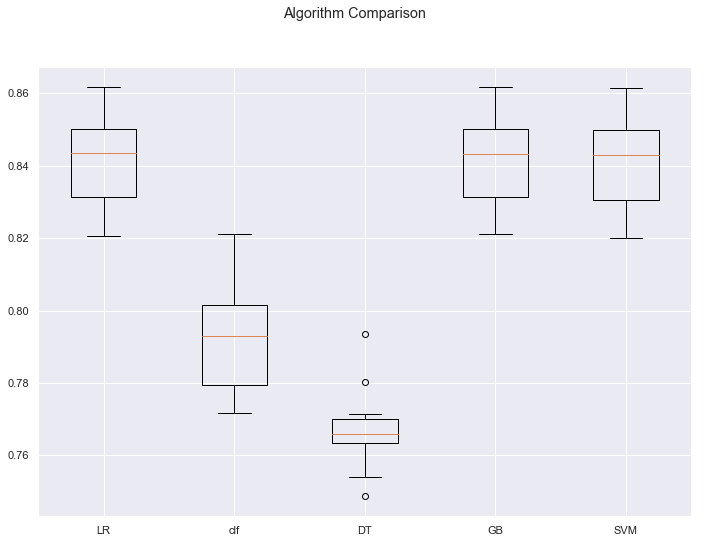

In [79]:
# prepare models
from sklearn import model_selection
models = []
models.append(('LR', LogisticRegression()))
models.append(('clf', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=0)
    cv_results = model_selection.cross_val_score(model, Xf, yf, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
#As we can see that our best two models are Logistic Regression(multinomial) & Gradient Boost however we would like to go
#ahead with GB based on its standard deviation which is lower.

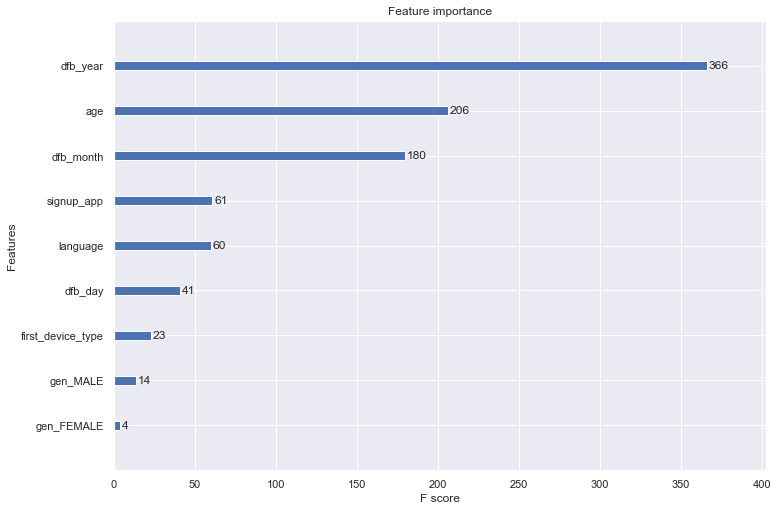

In [88]:
# plot feature importance using built-in function for GB
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
# fit model no training data
model = XGBClassifier()
model.fit(Xf, yf)
# plot feature importance
plot_importance(model)
pyplot.show()

Correlation:                  age  language  signup_app  dfb_year  dfb_month
age         1.000000  0.063912   -0.024814 -0.031444  -0.022027
language    0.063912  1.000000    0.003152  0.056592   0.040909
signup_app -0.024814  0.003152    1.000000 -0.017701  -0.013787
dfb_year   -0.031444  0.056592   -0.017701  1.000000   0.790562
dfb_month  -0.022027  0.040909   -0.013787  0.790562   1.000000


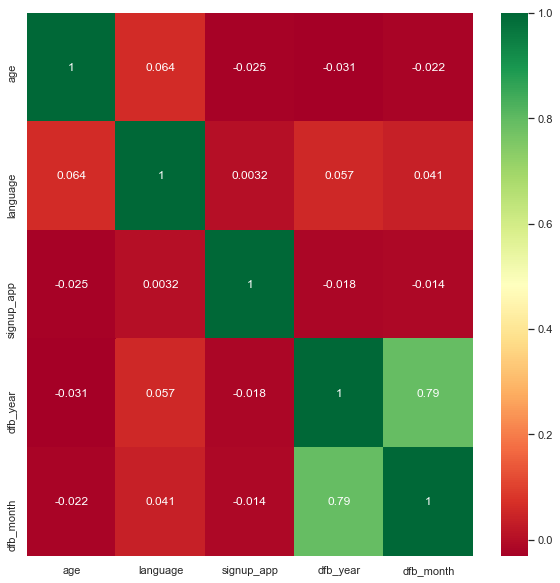

In [99]:
#get correlations of top five features in dataset
dafr = dffinal_g.copy()
dafr = dafr[['age','language','signup_app', 
                    'dfb_year','dfb_month', 'country_destination']]
corrmat = dafr.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
print("Correlation:", dafr.corr(method='pearson'))
#The darker the color the stronger the correlation in relevance to the other numbers. The only strong correlation we can
#see is between dfb_year and dfb_month.

In [163]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [169]:
Xf1 = dafr[['age','language','signup_app','dfb_year','dfb_month','dfb_day']]
yf1 = dafr[['country_destination']]
X_train, X_test, y_train, y_test = train_test_split(Xf1, yf1, random_state=1)

In [172]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [175]:
y_pred = knn.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8067680558298769


In [197]:
print(type(yf1))

<class 'pandas.core.frame.DataFrame'>
